# Housing Data Cleaning
## 90-803 Machine Learning Foundations with Python (Spring 2024)
### Team 17: Yoko, Tessa, Hannah

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

# Housing Data

The first file downloaded contains "bottom tier" housing values.

## "Bottom Tier" House Values

In [2]:
# Read data and display it
bottom_tier = pd.read_csv('bottom_tier.csv')
bottom_tier.head(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,2000-01-31,...,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29
0,3101,0,Los Angeles County,county,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",6,37,122826.545216,...,591373.020979,596056.091396,603537.833762,612566.897404,621765.754065,629592.635271,636099.052649,640823.262583,641214.481814,638171.746947
1,139,1,Cook County,county,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",17,31,71689.188026,...,168777.357552,169759.552951,170925.802575,172446.464705,173944.442887,175154.806215,175883.247413,176294.810659,176391.457896,177168.196816
2,1090,2,Harris County,county,TX,TX,"Houston-The Woodlands-Sugar Land, TX",48,201,61195.175569,...,194973.586364,195614.602922,196192.031021,196757.039648,196982.639667,197106.566608,197055.739677,197132.597210,197555.182700,198031.939194
3,2402,3,Maricopa County,county,AZ,AZ,"Phoenix-Mesa-Chandler, AZ",4,13,80846.367558,...,337677.141378,338952.811543,340925.308657,343408.206749,345722.807463,347776.661409,349394.773697,350410.957159,350910.151273,351368.973146
4,2841,4,San Diego County,county,CA,CA,"San Diego-Chula Vista-Carlsbad, CA",6,73,129636.480126,...,617399.448192,624446.698421,632629.375780,641275.847924,649377.668370,656150.440390,661139.763225,664185.328336,666407.203871,669505.295933


In [3]:
# Melt the data so that the dates are in rows
cols = bottom_tier.columns.to_list()
rest_of_cols = cols[9:]
bottom_tier_melted = pd.melt(bottom_tier, id_vars=cols[:9], 
                          var_name='Date', value_name='Average Home Value Estimate')
bottom_tier_melted.rename(columns={'Average Home Value Estimate': 'Bottom-Tier Average Home Value Estimate'}, inplace=True)
bottom_tier_melted['Date'] = pd.to_datetime(bottom_tier_melted['Date'], format='%Y-%m-%d')
bottom_tier_melted['Year'] = bottom_tier_melted['Date'].dt.year
bottom_tier_melted['Month'] = bottom_tier_melted['Date'].dt.month
bottom_tier_melted.sample(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,Date,Bottom-Tier Average Home Value Estimate,Year,Month
164136,3051,1875,Washington County,county,GA,GA,NaN,13,303,2004-07-31,34606.822864,2004,7
449940,942,2118,Clarke County,county,MS,MS,"Meridian, MS",28,23,2012-06-30,NaN,2012,6
611612,2484,1436,Pontotoc County,county,MS,MS,"Tupelo, MS",28,115,2016-12-31,109023.732561,2016,12
344152,992,1514,Dillon County,county,SC,SC,NaN,45,33,2009-07-31,54807.657868,2009,7
717462,427,2106,Casey County,county,KY,KY,NaN,21,45,2019-11-30,38137.101824,2019,11


In [4]:
# Let's explore the data
bottom_tier_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871740 entries, 0 to 871739
Data columns (total 13 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   RegionID                                 871740 non-null  int64         
 1   SizeRank                                 871740 non-null  int64         
 2   RegionName                               871740 non-null  object        
 3   RegionType                               871740 non-null  object        
 4   StateName                                871740 non-null  object        
 5   State                                    871740 non-null  object        
 6   Metro                                    526930 non-null  object        
 7   StateCodeFIPS                            871740 non-null  int64         
 8   MunicipalCodeFIPS                        871740 non-null  int64         
 9   Date                      

Since we already have RegionID, RegionName and the State, I don't think we need the "Metro" column anyway.
I'll drop that column and then explore the Average Home Value Estimates column.

In [5]:
# Drop repetitive 'metro'
bottom_tier_melted.drop(columns=['Metro'], inplace=True)

In [6]:
# Let's look what % of data is missing
num_missing = bottom_tier_melted[bottom_tier_melted['Bottom-Tier Average Home Value Estimate'].isna()].shape[0]
print("# missing values: ", num_missing)
print("Out of: ", bottom_tier_melted.shape[0])
print("Percent missing: ", (num_missing/bottom_tier_melted.shape[0])*100)

# missing values:  271635
Out of:  871740
Percent missing:  31.160093605891664


Text(0.5, 1.0, 'Histogram of value of bottom-tier home values')

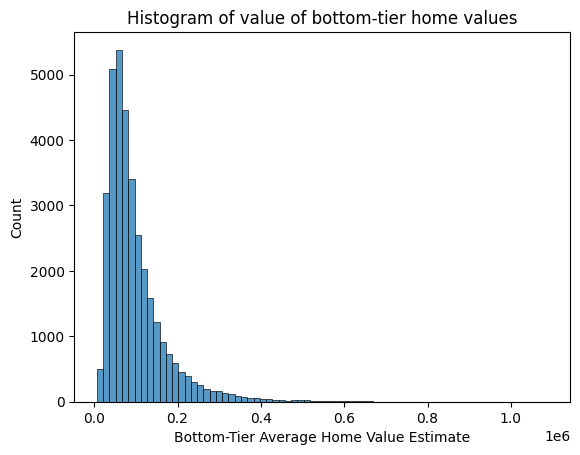

In [7]:
#sns.histplot(data=bottom_tier_melted, x='Average Home Value Estimate', binwidth=25000.00)
datasample = bottom_tier_melted.sample(50000)
#sns.scatterplot(data=datasample, x='Date', y='Average Home Value Estimate')
sns.histplot(data=datasample, x='Bottom-Tier Average Home Value Estimate', binwidth=15000.00).set_title("Histogram of value of bottom-tier home values")

Text(0.5, 1.0, 'Value of bottom-tier home values over time')

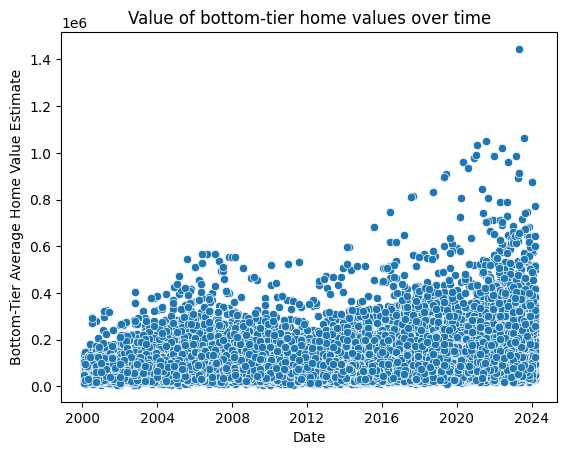

In [8]:
sns.scatterplot(data=bottom_tier_melted.sample(50000), x='Date', y='Bottom-Tier Average Home Value Estimate').set_title("Value of bottom-tier home values over time")

In [9]:
pd.options.display.float_format = '{:.2f}'.format
bottom_tier_melted.describe()

,RegionID,SizeRank,StateCodeFIPS,MunicipalCodeFIPS,Date,Bottom-Tier Average Home Value Estimate,Year,Month
count,871740.00,871740.00,871740.00,871740.00,871740,600105.00,871740.00,871740.00
mean,1904.44,1554.79,30.24,103.19,2012-02-14 08:01:39.310345216,98658.00,2011.59,6.47
min,66.00,0.00,1.00,1.00,2000-01-31 00:00:00,6109.40,2000.00,1.00
25%,870.00,760.00,18.00,35.00,2006-01-31 00:00:00,50844.70,2006.00,3.00
50%,1667.50,1549.50,29.00,79.00,2012-02-14 12:00:00,76618.66,2012.00,6.00
75%,2480.00,2337.00,45.00,133.00,2018-02-28 00:00:00,120488.06,2018.00,9.00
max,698720.00,3212.00,56.00,840.00,2024-02-29 00:00:00,1530350.43,2024.00,12.00
std,12745.44,912.88,15.06,107.46,NaN,77957.26,6.98,3.47


Given that this is time series information, I think any form of filling in the missing values via imputation, exptrapolation or interpolation would threaten the validity of any ML model. I'm going to drop all NaNs because imputing is not valid here.

In [10]:
bottom_tier_melted.dropna(inplace=True)

## "Top Tier" House Values
The next file is about "top tier" house values in different places over time.

In [11]:
# Read the data
top_tier = pd.read_csv('top_tier.csv')
top_tier.head(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,2000-01-31,...,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29
0,3101,0,Los Angeles County,county,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",6,37,400192.74,...,1375756.73,1385644.52,1403751.18,1427486.74,1451278.80,1470237.41,1482976.28,1489743.11,1484822.68,1472796.71
1,139,1,Cook County,county,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",17,31,302264.55,...,475771.18,478382.68,480986.87,483527.04,485021.50,485940.88,486200.32,486057.58,485922.70,487306.08
2,1090,2,Harris County,county,TX,TX,"Houston-The Woodlands-Sugar Land, TX",48,201,217850.46,...,449762.95,451369.32,452834.49,454302.14,455164.32,455476.72,455137.74,454793.81,455183.90,456360.47
3,2402,3,Maricopa County,county,AZ,AZ,"Phoenix-Mesa-Chandler, AZ",4,13,252240.11,...,698962.77,702994.66,707874.05,712693.03,716956.70,721046.99,724463.88,726277.12,726463.80,727033.04
4,2841,4,San Diego County,county,CA,CA,"San Diego-Chula Vista-Carlsbad, CA",6,73,387637.67,...,1394282.93,1409595.84,1427708.03,1446873.57,1465667.92,1481347.69,1491459.46,1495123.99,1496522.07,1502467.18


In [12]:
# Melt the data so that the dates are in rows
cols = top_tier.columns.to_list()
rest_of_cols = cols[9:]
top_tier_melted = pd.melt(top_tier, id_vars=cols[:9], 
                          var_name='Date', value_name='Average Home Value Estimate')
top_tier_melted.rename(columns={'Average Home Value Estimate': 'Top-Tier Average Home Value Estimate'}, inplace=True)
top_tier_melted['Date'] = pd.to_datetime(top_tier_melted['Date'], format='%Y-%m-%d')
top_tier_melted['Year'] = top_tier_melted['Date'].dt.year
top_tier_melted['Month'] = top_tier_melted['Date'].dt.month
top_tier_melted.sample(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,Date,Top-Tier Average Home Value Estimate,Year,Month
189734,1472,2042,Warren County,county,IL,IL,NaN,17,187,2005-02-28,NaN,2005,2
122393,849,2427,Barnes County,county,ND,ND,NaN,38,3,2003-04-30,NaN,2003,4
567982,2707,1679,Goochland County,county,VA,VA,"Richmond, VA",51,75,2015-05-31,646168.99,2015,5
713305,742,2361,Terry County,county,TX,TX,NaN,48,445,2019-04-30,170254.09,2019,4
890449,2637,918,Box Elder County,county,UT,UT,"Ogden-Clearfield, UT",49,3,2024-02-29,560603.48,2024,2


In [13]:
# Let's look at the data
top_tier_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892620 entries, 0 to 892619
Data columns (total 13 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   RegionID                              892620 non-null  int64         
 1   SizeRank                              892620 non-null  int64         
 2   RegionName                            892620 non-null  object        
 3   RegionType                            892620 non-null  object        
 4   StateName                             892620 non-null  object        
 5   State                                 892620 non-null  object        
 6   Metro                                 530700 non-null  object        
 7   StateCodeFIPS                         892620 non-null  int64         
 8   MunicipalCodeFIPS                     892620 non-null  int64         
 9   Date                                  892620 non-null  date

In [14]:
# To get a sense of order of magnitude, let's look at the percent missing
num_missing = top_tier_melted[top_tier_melted['Top-Tier Average Home Value Estimate'].isna()].shape[0]
print("# missing values: ", num_missing)
print("Out of: ", top_tier_melted.shape[0])
print("Percent missing: ", (num_missing/top_tier_melted.shape[0])*100)

# missing values:  271387
Out of:  892620
Percent missing:  30.403419148125742


Text(0.5, 1.0, 'Histogram of value of bottom-tier home values')

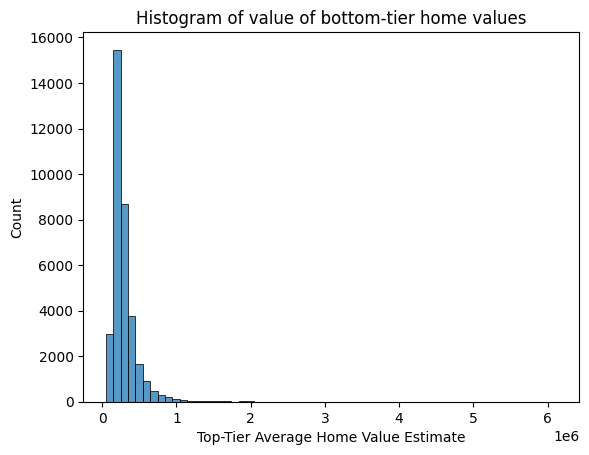

In [15]:
datasample = top_tier_melted.sample(50000)
sns.histplot(data=datasample, x='Top-Tier Average Home Value Estimate', binwidth=100000.00).set_title("Histogram of value of bottom-tier home values")

Text(0.5, 1.0, 'Top-tier home values over time')

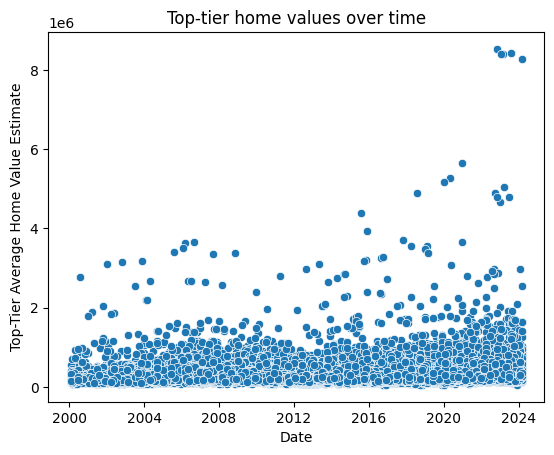

In [16]:
sns.scatterplot(data=top_tier_melted.sample(50000), x='Date', y='Top-Tier Average Home Value Estimate').set_title("Top-tier home values over time")

In [17]:
top_tier_melted.describe()

,RegionID,SizeRank,StateCodeFIPS,MunicipalCodeFIPS,Date,Top-Tier Average Home Value Estimate,Year,Month
count,892620.00,892620.00,892620.00,892620.00,892620,621233.00,892620.00,892620.00
mean,1898.99,1583.16,30.26,103.67,2012-02-14 08:01:39.310344704,294515.37,2011.59,6.47
min,66.00,0.00,1.00,1.00,2000-01-31 00:00:00,49292.38,2000.00,1.00
25%,872.00,778.00,18.00,35.00,2006-01-31 00:00:00,186792.21,2006.00,3.00
50%,1669.50,1583.50,29.00,79.00,2012-02-14 12:00:00,241261.15,2012.00,6.00
75%,2477.00,2383.00,45.00,133.00,2018-02-28 00:00:00,332025.66,2018.00,9.00
max,698720.00,3214.00,56.00,840.00,2024-02-29 00:00:00,8783786.98,2024.00,12.00
std,12596.21,922.74,15.08,108.00,NaN,227516.59,6.98,3.47


Given that this is time series information, I think any form of filling in the missing values via imputation, exptrapolation or interpolation would threaten the validity of any ML model. I'm going to drop all NaNs because imputing is not valid here.

In [18]:
top_tier_melted.dropna(inplace=True)

## Merge these dataframes

In [19]:
top_tier_melted.head(10)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,Date,Top-Tier Average Home Value Estimate,Year,Month
0,3101,0,Los Angeles County,county,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",6,37,2000-01-31,400192.74,2000,1
1,139,1,Cook County,county,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",17,31,2000-01-31,302264.55,2000,1
2,1090,2,Harris County,county,TX,TX,"Houston-The Woodlands-Sugar Land, TX",48,201,2000-01-31,217850.46,2000,1
3,2402,3,Maricopa County,county,AZ,AZ,"Phoenix-Mesa-Chandler, AZ",4,13,2000-01-31,252240.11,2000,1
4,2841,4,San Diego County,county,CA,CA,"San Diego-Chula Vista-Carlsbad, CA",6,73,2000-01-31,387637.67,2000,1
5,1286,5,Orange County,county,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",6,59,2000-01-31,440708.77,2000,1
6,581,6,Kings County,county,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",36,47,2000-01-31,405673.23,2000,1
7,2964,7,Miami-Dade County,county,FL,FL,"Miami-Fort Lauderdale-Pompano Beach, FL",12,86,2000-01-31,248410.43,2000,1
8,978,8,Dallas County,county,TX,TX,"Dallas-Fort Worth-Arlington, TX",48,113,2000-01-31,208140.24,2000,1
9,2832,9,Riverside County,county,CA,CA,"Riverside-San Bernardino-Ontario, CA",6,65,2000-01-31,243787.23,2000,1


In [20]:
bottom_tier_melted.head(10)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,StateCodeFIPS,MunicipalCodeFIPS,Date,Bottom-Tier Average Home Value Estimate,Year,Month
0,3101,0,Los Angeles County,county,CA,CA,6,37,2000-01-31,122826.55,2000,1
1,139,1,Cook County,county,IL,IL,17,31,2000-01-31,71689.19,2000,1
2,1090,2,Harris County,county,TX,TX,48,201,2000-01-31,61195.18,2000,1
3,2402,3,Maricopa County,county,AZ,AZ,4,13,2000-01-31,80846.37,2000,1
4,2841,4,San Diego County,county,CA,CA,6,73,2000-01-31,129636.48,2000,1
5,1286,5,Orange County,county,CA,CA,6,59,2000-01-31,158481.92,2000,1
6,581,6,Kings County,county,NY,NY,36,47,2000-01-31,108943.52,2000,1
7,2964,7,Miami-Dade County,county,FL,FL,12,86,2000-01-31,61205.16,2000,1
8,978,8,Dallas County,county,TX,TX,48,113,2000-01-31,49989.50,2000,1
9,2832,9,Riverside County,county,CA,CA,6,65,2000-01-31,89927.91,2000,1


In [21]:
merged_data = pd.merge(left=bottom_tier_melted, right=top_tier_melted[['RegionID', 'Year', 'Month', 'Top-Tier Average Home Value Estimate']],\
                        on=['RegionID', 'Year', 'Month'])
merged_data.sample(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,StateCodeFIPS,MunicipalCodeFIPS,Date,Bottom-Tier Average Home Value Estimate,Year,Month,Top-Tier Average Home Value Estimate
401095,2433,1805,Minidoka County,county,ID,ID,16,67,2023-09-30,214473.67,2023,9,468762.85
214959,1370,750,Scioto County,county,OH,OH,39,145,2015-01-31,37844.91,2015,1,149842.73
161357,2023,375,Shawnee County,county,KS,KS,20,177,2012-05-31,54109.47,2012,5,182141.02
69999,2735,2196,Jefferson County,county,FL,FL,12,65,2006-06-30,89869.08,2006,6,412402.24
47365,1469,632,Walton County,county,GA,GA,13,297,2004-07-31,126765.68,2004,7,399455.74


In [22]:
new_column_order = ['Date',  'Year', 'Month','RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'StateCodeFIPS', 'MunicipalCodeFIPS',
       'Bottom-Tier Average Home Value Estimate', 'Top-Tier Average Home Value Estimate']
merged_data = merged_data[new_column_order]
merged_data.sample(5)

,Date,Year,Month,RegionID,SizeRank,RegionName,RegionType,StateName,State,StateCodeFIPS,MunicipalCodeFIPS,Bottom-Tier Average Home Value Estimate,Top-Tier Average Home Value Estimate
357731,2021-09-30,2021,9,363,1860,Adams County,county,WA,WA,53,1,161327.33,349382.08
309083,2019-06-30,2019,6,391,1581,Boone County,county,IA,IA,19,15,91383.49,278208.68
130778,2010-09-30,2010,9,1590,533,Carroll County,county,GA,GA,13,45,43702.83,158479.39
393625,2023-05-31,2023,5,1626,1392,Clinton County,county,IN,IN,18,23,118648.92,289106.79
160446,2012-04-30,2012,4,2920,1223,Des Moines County,county,IA,IA,19,57,39303.79,158850.91


In [23]:
merged_data.to_csv("homevalues.csv")

This data frame only contains data on home values over time throughout the united states. Other datafiles didn't go far back enough in time and the location didn't match and would have needed to be "map-matched" to the other data sources. 

### References

1. https://pandas.pydata.org/docs/reference/api/pandas.melt.html
2. https://www.zillow.com/research/data/